In [ ]:
# pip install NeuralForecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.6/213.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.5/193.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 12.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models import NHITS
from neuralforecast import NeuralForecast
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer,NHITS,DilatedRNN
from neuralforecast.models import NBEATS,FEDformer

In [ ]:

# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# X_df = pd.read_csv('/content/drive/MyDrive/AML Reproducibility Challenge/datasets/ETTm2/df_x.csv')
# Y_df = pd.read_csv('/content/drive/MyDrive/AML Reproducibility Challenge/datasets/ETTm2/df_y.csv')

X_df = pd.read_csv('@datasets_reproducibity/ETTm2/df_x.csv')
Y_df = pd.read_csv('@datasets_reproducibity/ETTm2/df_y.csv')

In [ ]:
X_df

,ds,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 00:00:00,-0.500000,0.166667,-0.500000,-0.001370
1,2016-07-01 00:15:00,-0.500000,0.166667,-0.500000,-0.001370
2,2016-07-01 00:30:00,-0.500000,0.166667,-0.500000,-0.001370
3,2016-07-01 00:45:00,-0.500000,0.166667,-0.500000,-0.001370
4,2016-07-01 01:00:00,-0.456522,0.166667,-0.500000,-0.001370
...,...,...,...,...,...
57595,2018-02-20 22:45:00,0.456522,-0.333333,0.133333,-0.363014
57596,2018-02-20 23:00:00,0.500000,-0.333333,0.133333,-0.363014
57597,2018-02-20 23:15:00,0.500000,-0.333333,0.133333,-0.363014
57598,2018-02-20 23:30:00,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
Y_df

,ds,unique_id,y
0,2016-07-01 00:00:00,OT,1.018032
1,2016-07-01 00:15:00,OT,0.980124
2,2016-07-01 00:30:00,OT,0.904223
3,2016-07-01 00:45:00,OT,0.885226
4,2016-07-01 01:00:00,OT,0.885226
...,...,...,...
57595,2018-02-20 22:45:00,OT,-1.581325
57596,2018-02-20 23:00:00,OT,-1.581325
57597,2018-02-20 23:15:00,OT,-1.581325
57598,2018-02-20 23:30:00,OT,-1.562328


In [ ]:
Y_df['unique_id'].unique()

array(['OT'], dtype=object)

In [ ]:
Y_df['ex_1']=X_df['ex_1']
Y_df['ex_2']=X_df['ex_2']
Y_df['ex_3']=X_df['ex_3']
Y_df['ex_4']=X_df['ex_4']

Y_df=Y_df.dropna()

In [ ]:
Y_df['ds'] = pd.to_datetime(Y_df['ds'])


## Horizon 96

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 00:00:00,OT,1.018032,-0.500000,0.166667,-0.500000,-0.001370
1,2016-07-01 00:15:00,OT,0.980124,-0.500000,0.166667,-0.500000,-0.001370
2,2016-07-01 00:30:00,OT,0.904223,-0.500000,0.166667,-0.500000,-0.001370
3,2016-07-01 00:45:00,OT,0.885226,-0.500000,0.166667,-0.500000,-0.001370
4,2016-07-01 01:00:00,OT,0.885226,-0.456522,0.166667,-0.500000,-0.001370
...,...,...,...,...,...,...,...
57595,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
57596,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57597,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57598,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
Y_train_df = Y_df.iloc[:57504,:]
Y_test_df = Y_df.iloc[57504:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,57504,2018-02-20 00:00:00,OT,-1.277761,-0.500000,-0.333333,0.133333,-0.363014
1,57505,2018-02-20 00:15:00,OT,-1.277761,-0.500000,-0.333333,0.133333,-0.363014
2,57506,2018-02-20 00:30:00,OT,-1.277761,-0.500000,-0.333333,0.133333,-0.363014
3,57507,2018-02-20 00:45:00,OT,-1.277761,-0.500000,-0.333333,0.133333,-0.363014
4,57508,2018-02-20 01:00:00,OT,-1.277761,-0.456522,-0.333333,0.133333,-0.363014
...,...,...,...,...,...,...,...,...
91,57595,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
92,57596,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
93,57597,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
94,57598,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-02-20 00:00:00,OT,-1.277761,-0.500000,-0.333333,0.133333,-0.363014
1,2018-02-20 00:15:00,OT,-1.277761,-0.500000,-0.333333,0.133333,-0.363014
2,2018-02-20 00:30:00,OT,-1.277761,-0.500000,-0.333333,0.133333,-0.363014
3,2018-02-20 00:45:00,OT,-1.277761,-0.500000,-0.333333,0.133333,-0.363014
4,2018-02-20 01:00:00,OT,-1.277761,-0.456522,-0.333333,0.133333,-0.363014
...,...,...,...,...,...,...,...
91,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
92,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
93,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
94,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
model=DilatedRNN(h=96,
                       input_size=24,
                        encoder_hidden_size=100,
                       max_steps=200,
                    )



/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
2024-04-20 17:58:02.544040: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-20 17:58:02.576279: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when 

Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=200` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,DilatedRNN
unique_id,,
OT,0,-0.986723
OT,1,-0.979227
OT,2,-0.991192
OT,3,-0.974389
OT,4,-0.998059
...,...,...
OT,91,-0.876347
OT,92,-0.860617
OT,93,-0.875268


<Axes: xlabel='ds'>

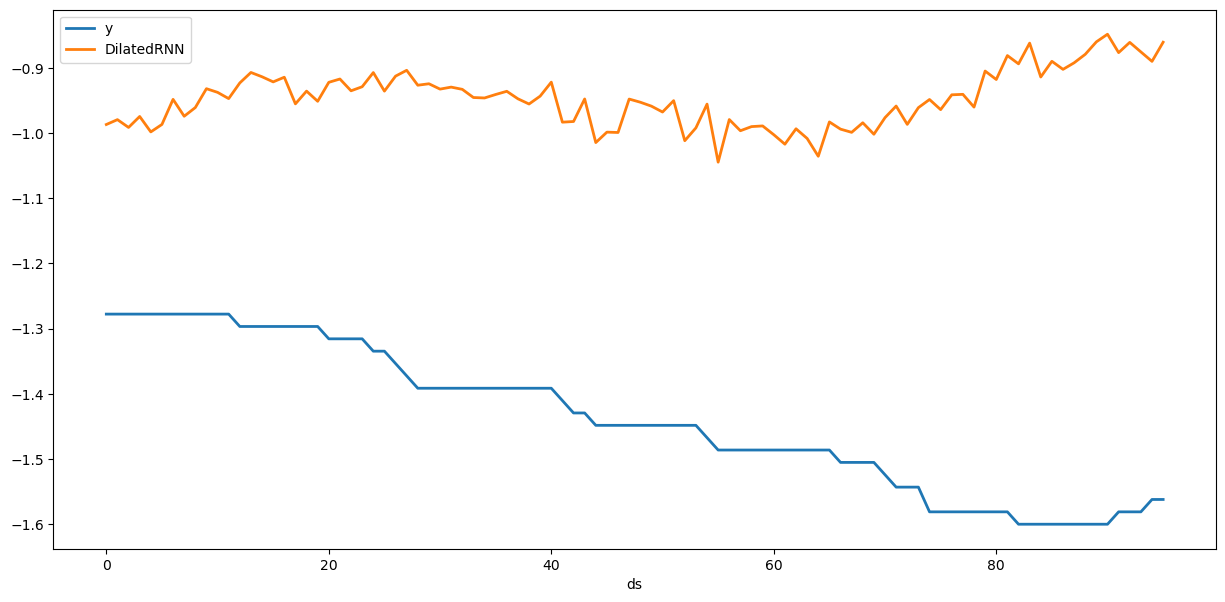

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'DilatedRNN']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,DilatedRNN
ds,
0,-0.986723
1,-0.979227
2,-0.991192
3,-0.974389
4,-0.998059
...,...
91,-0.876347
92,-0.860617
93,-0.875268


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_DilatedRNN = mae(Y_test_df['y'], forecasts['DilatedRNN'])
mse_DilatedRNN = mse(Y_test_df['y'], forecasts['DilatedRNN'])
print(f'DilatedRNN MAE: {mae_DilatedRNN:.3f}')
print(f'DilatedRNN MSE: {mse_DilatedRNN:.3f}')

DilatedRNN MAE: 0.492
DilatedRNN MSE: 0.258


## Horizon 192

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 00:00:00,OT,1.018032,-0.500000,0.166667,-0.500000,-0.001370
1,2016-07-01 00:15:00,OT,0.980124,-0.500000,0.166667,-0.500000,-0.001370
2,2016-07-01 00:30:00,OT,0.904223,-0.500000,0.166667,-0.500000,-0.001370
3,2016-07-01 00:45:00,OT,0.885226,-0.500000,0.166667,-0.500000,-0.001370
4,2016-07-01 01:00:00,OT,0.885226,-0.456522,0.166667,-0.500000,-0.001370
...,...,...,...,...,...,...,...
57595,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
57596,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57597,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57598,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
Y_train_df = Y_df.iloc[:57408,:]
Y_test_df = Y_df.iloc[57408:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,57408,2018-02-19 00:00:00,OT,-1.429522,-0.500000,-0.500000,0.100000,-0.365753
1,57409,2018-02-19 00:15:00,OT,-1.429522,-0.500000,-0.500000,0.100000,-0.365753
2,57410,2018-02-19 00:30:00,OT,-1.429522,-0.500000,-0.500000,0.100000,-0.365753
3,57411,2018-02-19 00:45:00,OT,-1.429522,-0.500000,-0.500000,0.100000,-0.365753
4,57412,2018-02-19 01:00:00,OT,-1.429522,-0.456522,-0.500000,0.100000,-0.365753
...,...,...,...,...,...,...,...,...
187,57595,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
188,57596,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
189,57597,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
190,57598,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-02-19 00:00:00,OT,-1.429522,-0.500000,-0.500000,0.100000,-0.365753
1,2018-02-19 00:15:00,OT,-1.429522,-0.500000,-0.500000,0.100000,-0.365753
2,2018-02-19 00:30:00,OT,-1.429522,-0.500000,-0.500000,0.100000,-0.365753
3,2018-02-19 00:45:00,OT,-1.429522,-0.500000,-0.500000,0.100000,-0.365753
4,2018-02-19 01:00:00,OT,-1.429522,-0.456522,-0.500000,0.100000,-0.365753
...,...,...,...,...,...,...,...
187,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
188,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
189,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
190,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
model=DilatedRNN(h=192,
                       input_size=24,
                        encoder_hidden_size=100,
                       max_steps=2,
                    )



/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/common/_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type          | Params
--------------------------------------------------
0 | loss            | MAE           | 0     
1 | padder          | ConstantPad1d | 0     
2 | scaler          | TemporalNorm  | 0     
3 | rnn_stack       | Sequential    | 283 K 
4 | context_adapter | Linear        | 193 K 
5 | mlp_decoder     | MLP           | 2.4 K 
--------------------------------------------------
479 K     Trainable params
0         Non-trainable params
479 K     Total params
1.920     Total estimated model params size (MB)


Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=2` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'DilatedRNN']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_DilatedRNN = mae(Y_test_df['y'], forecasts['DilatedRNN'])
mse_DilatedRNN = mse(Y_test_df['y'], forecasts['DilatedRNN'])
print(f'DilatedRNN MAE: {mae_DilatedRNN:.3f}')
print(f'DilatedRNN MSE: {mse_DilatedRNN:.3f}')

## Horizon 336

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-2.162911,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.949045,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.077105,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.129411,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.154662,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
26299,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.00411
26300,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.00411
26301,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.00411
26302,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.00137


In [ ]:
Y_train_df = Y_df.iloc[:57264,:]
Y_test_df = Y_df.iloc[57264:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,57264,2018-02-17 12:00:00,OT,-0.860344,0.021739,0.333333,0.033333,-0.371233
1,57265,2018-02-17 12:15:00,OT,-0.822393,0.021739,0.333333,0.033333,-0.371233
2,57266,2018-02-17 12:30:00,OT,-0.822393,0.021739,0.333333,0.033333,-0.371233
3,57267,2018-02-17 12:45:00,OT,-0.765445,0.021739,0.333333,0.033333,-0.371233
4,57268,2018-02-17 13:00:00,OT,-0.708540,0.065217,0.333333,0.033333,-0.371233
...,...,...,...,...,...,...,...,...
331,57595,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
332,57596,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
333,57597,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
334,57598,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2019-06-28 02:00:00,OT,-0.929204,-0.413043,0.166667,0.400000,-0.012329
1,2019-06-28 03:00:00,OT,-0.974296,-0.369565,0.166667,0.400000,-0.012329
2,2019-06-28 04:00:00,OT,-0.884113,-0.326087,0.166667,0.400000,-0.012329
3,2019-06-28 05:00:00,OT,-1.210576,-0.282609,0.166667,0.400000,-0.012329
4,2019-06-28 06:00:00,OT,-1.113178,-0.239130,0.166667,0.400000,-0.012329
...,...,...,...,...,...,...,...
91,2019-07-01 21:00:00,OT,-1.060872,0.413043,-0.500000,-0.500000,-0.004110
92,2019-07-01 22:00:00,OT,-1.093338,0.456522,-0.500000,-0.500000,-0.004110
93,2019-07-01 23:00:00,OT,-1.282723,0.500000,-0.500000,-0.500000,-0.004110
94,2019-07-02 00:00:00,OT,-1.158270,-0.500000,-0.333333,-0.466667,-0.001370


In [ ]:
model=DilatedRNN(h=336,
                       input_size=-1,
                        encoder_hidden_size=100,
                       max_steps=200,
                    )



INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type          | Params
--------------------------------------------------
0 | loss            | MAE           | 0     
1 | padder          | ConstantPad1d | 0     
2 | scaler          | TemporalNorm  | 0     
3 | rnn_stack       | Sequential    | 283 K 
4 | context_adapter | Linear        | 97.0 K
5 | mlp_decoder     | MLP           | 2.4 K 
--------------------------------------------------
382 K     Trainable params
0         Non-trainable params
382 K     Total params
1.532     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...
/usr/local/lib/python3.10/dist-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,DilatedRNN
unique_id,,
OT,0,-0.164592
OT,1,-0.174267
OT,2,-0.161306
OT,3,-0.167306
OT,4,-0.163474
...,...,...
OT,91,-0.154690
OT,92,-0.162441
OT,93,-0.158271


<Axes: xlabel='ds'>

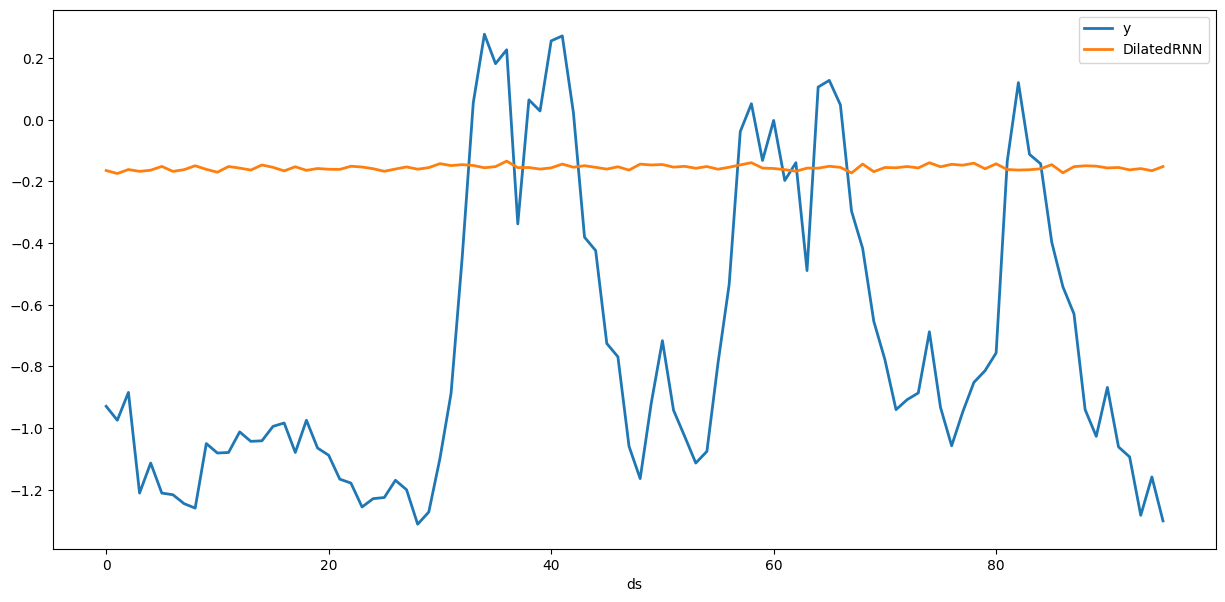

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'DilatedRNN']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,DilatedRNN
ds,
0,-0.164592
1,-0.174267
2,-0.161306
3,-0.167306
4,-0.163474
...,...
91,-0.154690
92,-0.162441
93,-0.158271


In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_DilatedRNN = mae(Y_test_df['y'], forecasts['DilatedRNN'])
mse_DilatedRNN = mse(Y_test_df['y'], forecasts['DilatedRNN'])
print(f'DilatedRNN MAE: {mae_DilatedRNN:.3f}')
print(f'DilatedRNN MSE: {mse_DilatedRNN:.3f}')

DilatedRNN MAE: 0.652
DilatedRNN MSE: 0.541


## Horizon 720

In [ ]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 00:00:00,OT,1.018032,-0.500000,0.166667,-0.500000,-0.001370
1,2016-07-01 00:15:00,OT,0.980124,-0.500000,0.166667,-0.500000,-0.001370
2,2016-07-01 00:30:00,OT,0.904223,-0.500000,0.166667,-0.500000,-0.001370
3,2016-07-01 00:45:00,OT,0.885226,-0.500000,0.166667,-0.500000,-0.001370
4,2016-07-01 01:00:00,OT,0.885226,-0.456522,0.166667,-0.500000,-0.001370
...,...,...,...,...,...,...,...
57595,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
57596,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57597,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
57598,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
Y_train_df = Y_df.iloc[:56880,:]
Y_test_df = Y_df.iloc[56880:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,56880,2018-02-13 12:00:00,OT,-0.689543,0.021739,-0.333333,-0.100000,-0.382192
1,56881,2018-02-13 12:15:00,OT,-0.632682,0.021739,-0.333333,-0.100000,-0.382192
2,56882,2018-02-13 12:30:00,OT,-0.613685,0.021739,-0.333333,-0.100000,-0.382192
3,56883,2018-02-13 12:45:00,OT,-0.575734,0.021739,-0.333333,-0.100000,-0.382192
4,56884,2018-02-13 13:00:00,OT,-0.518786,0.065217,-0.333333,-0.100000,-0.382192
...,...,...,...,...,...,...,...,...
715,57595,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
716,57596,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
717,57597,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
718,57598,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-02-13 12:00:00,OT,-0.689543,0.021739,-0.333333,-0.100000,-0.382192
1,2018-02-13 12:15:00,OT,-0.632682,0.021739,-0.333333,-0.100000,-0.382192
2,2018-02-13 12:30:00,OT,-0.613685,0.021739,-0.333333,-0.100000,-0.382192
3,2018-02-13 12:45:00,OT,-0.575734,0.021739,-0.333333,-0.100000,-0.382192
4,2018-02-13 13:00:00,OT,-0.518786,0.065217,-0.333333,-0.100000,-0.382192
...,...,...,...,...,...,...,...
715,2018-02-20 22:45:00,OT,-1.581325,0.456522,-0.333333,0.133333,-0.363014
716,2018-02-20 23:00:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
717,2018-02-20 23:15:00,OT,-1.581325,0.500000,-0.333333,0.133333,-0.363014
718,2018-02-20 23:30:00,OT,-1.562328,0.500000,-0.333333,0.133333,-0.363014


In [ ]:
model=DilatedRNN(h=720,
                input_size=-1,
                encoder_hidden_size=100,
                max_steps=200,
                )



/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq='H')

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type          | Params
--------------------------------------------------
0 | loss            | MAE           | 0     
1 | padder          | ConstantPad1d | 0     
2 | scaler          | TemporalNorm  | 0     
3 | rnn_stack       | Sequential    | 64    
4 | context_adapter | Linear        | 14.4 K
5 | mlp_decoder     | MLP           | 2.4 K 
--------------------------------------------------
16.9 K    Trainable params
0         Non-trainable params
16.9 K    Total params
0.067     Total estimated model params size (MB

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 30.51 GiB. GPU 0 has a total capacity of 14.75 GiB of which 10.12 GiB is free. Process 9341 has 4.62 GiB memory in use. Of the allocated memory 4.32 GiB is allocated by PyTorch, and 171.47 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

NameError: name 'forecasts' is not defined

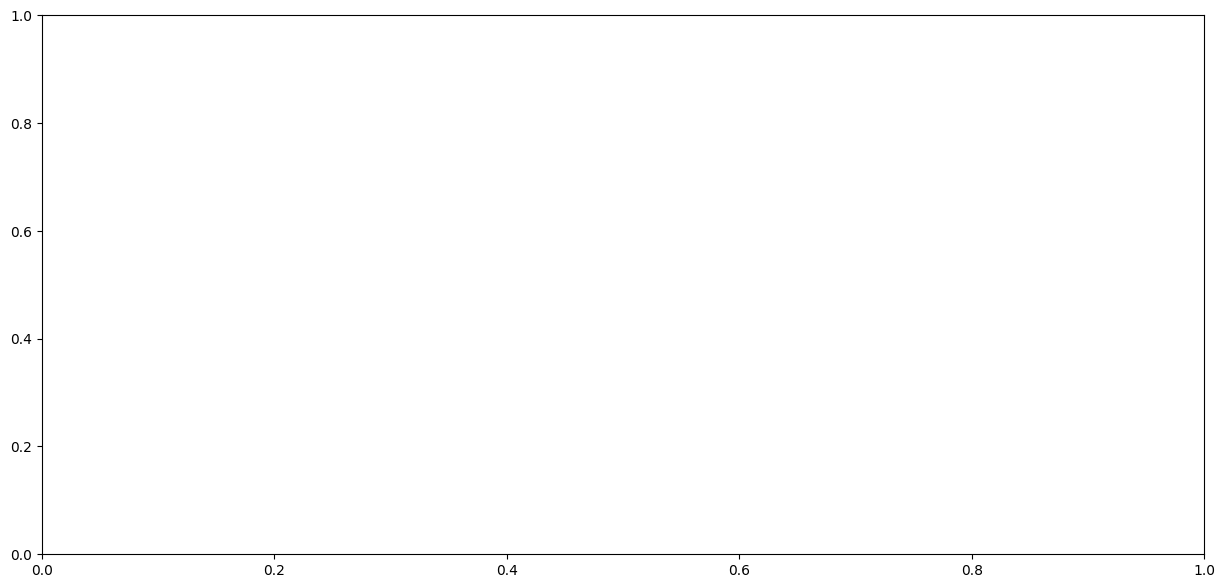

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'DilatedRNN']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

NameError: name 'forecasts' is not defined

In [ ]:
from neuralforecast.losses.numpy import mae,mse


mae_DilatedRNN = mae(Y_test_df['y'], forecasts['DilatedRNN'])
mse_DilatedRNN = mse(Y_test_df['y'], forecasts['DilatedRNN'])
print(f'DilatedRNN MAE: {mae_DilatedRNN:.3f}')
print(f'DilatedRNN MSE: {mse_DilatedRNN:.3f}')

NameError: name 'forecasts' is not defined